## Project: Google Stock Price Prediction using RNN and LSTM

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PreProcessing

In [12]:
data_train=pd.read_csv('Google_Stock_Price_Train.csv')
data_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


### Checking missing values

In [3]:
data_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
data_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [5]:
train_set=data_train.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

MinMaxScaler scales the values between 0 and 1

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))
train_data_scaled=sc.fit_transform(train_set)

In [20]:
train_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Create a data structure with 60 timesteps with one output

x_train- input to RNN- index-(0-59) RNN train and learn, next time step- t+1- index(1-60) 
y_train- one output- index(60) RNN learn to predict- Predict index(61) for t+1

x_train, y_train both are inputs. RNN learn the i/p and o/p and predict the upcoming stock prices
based on this learning.

In [21]:
x_train=[]
y_train=[]
for i in range(60,len(data_train)):
    x_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train) #  To convert list into array

In [24]:
train_data_scaled[0:62,0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656,
       0.08627874, 0.08471612])

In [25]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [26]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

RNN always take the input in 3 dimension  that why we reshape the above 2D x_train to 3D

In [30]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

np.reshape(array,(batch_size, timesteps, no. of indicator))

In [27]:
x_train.shape[0]

1198

In [28]:
x_train.shape[1]

60

In [33]:
x_train.ndim   # This attribute is used to check the dimension of the array.

3

### Building RNN model

Dropout is a technique where randomly selected neurons are ignored during training.

LSTM- Long Short Term Memory- Variety/kind of RNN- Used for predicting sequential problems.
In LSTM architecture, there is a horizontal pipeline called memory cell which lets the information flow through it. There is a valve/gate in LSTM helps to add and remove the information.

Dense Class is a output layer- Fully connected layer

### Import libraries

In [34]:
from keras.models import Sequential   #  Create sequence of layers
from keras.layers import Dense        # Create output layer
from keras.layers import LSTM         # Long Short Term Memory Layer
from keras.layers import Dropout      # Prevent  overfitting

#### Initializing RNN

In [35]:
regressor=Sequential()    # Here we use regressor object becoz stock prices are the continuous val

#### Adding first layer LSTM and some dropout regularization.

In [36]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

regressor.add(Dropout(rate=0.2))    # 20 % of neurons will be ignored during training. 
                                    # LSTM- 50 neurons- 10 neurons "...

#### Adding Second layer LSTM and some dropout regularization.

In [37]:
regressor.add(LSTM(units=50, return_sequences=True))

regressor.add(Dropout(rate=0.2))    

#### Adding third layer LSTM and some dropout regularization.

In [38]:
regressor.add(LSTM(units=50, return_sequences=True))

regressor.add(Dropout(rate=0.2))    

#### Adding fourth layer LSTM and some dropout regularization.

In [39]:
regressor.add(LSTM(units=50))

regressor.add(Dropout(rate=0.2))    

#### Adding the output layer

In [40]:
regressor.add(Dense(units=1))

#### Compiling the RNN

optimizers are used to minimize the loss function- stochastic gradient descent.

In [41]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#### Fitting the RNN to the training set

In [42]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 81ms/step - loss: 0.0291
Epoch 2/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

### Making the prediction and visualizing the results

#### Getting the real stock price of 2017

In [43]:
data_test=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=data_test.iloc[:,1:2].values

#### Getting the predicted stock price of 2017

In [44]:
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

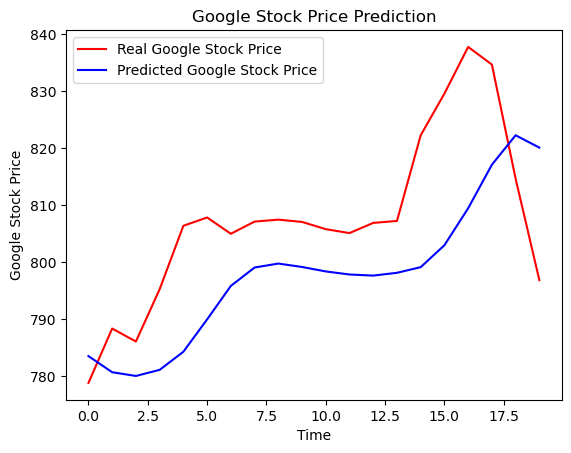

In [45]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()